# Supervised Learning

## Picking an algorithm

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Linear Regression (Single Variable)

In [1]:
import os
import copy

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

%matplotlib inline

### In Linear Regression, I recommend checking Linear Algebra out

also, check my Linear Regression implementation from scratch!
https://github.com/Alex4386/linear-regression-from-scratch  


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = '../Resources/data/50_Startups.csv'
df1 = pd.read_csv(path)
df1.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [3]:
data = df1.values[:, :3]
label = df1.values[:, 4]
columns = ['R&D Spend', 'Administration', 'Marketing Spend']

In [4]:
data = pd.DataFrame(data, columns = columns)
data.head(3)

,R&D Spend,Administration,Marketing Spend
0,165349,136898,471784
1,162598,151378,443899
2,153442,101146,407935


## Train & Test Data Setup

In [5]:
#x, x, y, y
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data, label, test_size = 0.2, random_state = 0)
len(x_train), len(x_test)

(40, 10)

## Load Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

sim_lr = LinearRegression()

## TRAIN

In [7]:
sim_lr.fit(x_train['R&D Spend'].values.reshape((-1, 1)), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict

In [8]:
y_pred = sim_lr.predict(x_test['R&D Spend'].values.reshape((-1, 1)))

## Validation

In [9]:
from sklearn.metrics import r2_score

print('Single value Linear Regression, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

Single value Linear Regression, R2 : 0.9465


## Drawing Graph

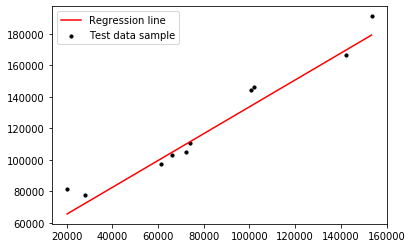

In [10]:
line_x = np.linspace(np.min(x_test['R&D Spend']), np.max(x_test['R&D Spend']), 10) 
line_y = sim_lr.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['R&D Spend'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

## Getting Bias and Weight

In [11]:
print('Linear Regression, weight: {:.4f}, bias: {:.4f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

Linear Regression, weight: 0.8516, bias: 48416.2977


## Machine Learning Algorithm Based Linear Regression

In [12]:
result = dict()

## Import Models

In [13]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Ridge Model

In [14]:
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9393955917778882

### Lasso Model

In [15]:
model = Lasso()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9393955925503304

### BayesianRidge Model

In [16]:
model = BayesianRidge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9375447257635988

### SVR

In [17]:
model = SVR(gamma='scale')
model.fit(x_train, y_train)
model.score(x_test, y_test)

-0.15943042214297654

### DecisionTreeRegressor

In [18]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9616813552258671

## Expecting Boston Real-estate prices

### Load Packages

In [19]:
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import  linear_model

### Load Datasets: Boston real-estate pricing

In [20]:
from sklearn.datasets import load_boston
boston = load_boston()

In [21]:
data = boston.data #data
label = boston.target #label
columns = boston.feature_names

In [22]:
data = pd.DataFrame(data, columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Preaparing for Training

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2019) 

# Checking Dimensions
x_train.shape, x_test.shape

((404, 13), (102, 13))

### Training with Multi-valued Linear Regression

In [25]:
result = dict()  # Save Results
model = dict()   # Save Model?


from sklearn.linear_model import Ridge
reg = linear_model.Ridge()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)
result["Ridge"] = reg.score(x_test, y_test)
model["Ridge"] = reg


from sklearn.linear_model import Lasso
reg = linear_model.Lasso()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)
result["Lasso"] = reg.score(x_test, y_test)
model["Lasso"] = reg

reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)
result["BayesianRidge"] = reg.score(x_test, y_test)
model["BayesianRidge"] = reg

from sklearn.svm import SVR
reg = SVR(gamma='scale')
reg.fit(x_train, y_train)
reg.score(x_test, y_test)
result["SVR"] = reg.score(x_test, y_test)
model["BayesianRidge"] = reg

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)
result["Tree"] = reg.score(x_test, y_test)
model["Tree"] = reg

print("Boston Real-estate price expectations: ")
pd.Series(result)

Boston Real-estate price expectations: 


Ridge            0.608981
Lasso            0.618476
BayesianRidge    0.611317
SVR              0.256948
Tree             0.677502
dtype: float64

In [26]:
model.keys()

dict_keys(['Ridge', 'Lasso', 'BayesianRidge', 'Tree'])

In [27]:
pred_y = model['Ridge'].predict(x_test)
pred_y

array([19.89911614, 30.15842428, 11.75968902, 16.32729724, 26.85113598,
       13.10793088, 25.63067736, 24.6230831 , 33.66624534, 33.12813904,
       25.19041426, 31.68351062, 19.83304828, 12.4963169 , -6.77102185,
       22.97786835, 15.22493546, 43.66232255, 22.44186018,  3.78365432,
       31.41417062, 20.34973742, 23.09246033, 19.78725704, 12.94475603,
       32.74826305, 21.77979678, 23.78860085, 18.24304474, 31.30222771,
       16.65424648, 22.6495388 , 19.16633865, 28.61426574, 17.93762257,
       17.39154114, 18.64838311, 14.05107002, 28.93082795, 20.41507634,
       36.44336249, 18.09599245, 21.25509705, 19.87720582, 31.41030485,
       31.93467558, 23.02735792, 34.75602977, 17.15055308,  3.39948769,
       21.08844706, 24.05319383, 15.85730773, 27.96058272, 25.23843639,
       23.07469626, 20.04863209, 33.29672443, 13.98139011, 19.49920413,
       22.86449721, 25.53682808, 12.48152282, 16.21515863, 14.10190012,
       30.62530838, 31.89760887, 29.02050975,  8.36009016, 28.73

In [28]:
print('Ridge Model: weight: {}, bias: {:.4f}'.format( model['Ridge'].coef_,  model['Ridge'].intercept_))

Ridge Model: weight: [-1.37214176e-01  4.32001455e-02 -3.13623167e-02  3.64889672e+00
 -8.22807634e+00  4.54717452e+00 -5.13630027e-03 -1.29228739e+00
  2.63019109e-01 -1.08311681e-02 -7.69093871e-01  1.06899742e-02
 -5.29823589e-01], bias: 22.9696


In [29]:
pd.DataFrame([pred_y, y_test], index = ['prediction', 'testdata']).T.head(10)

,prediction,testdata
0,19.899116,19.9
1,30.158424,23.0
2,11.759689,10.8
3,16.327297,19.1
4,26.851136,22.8
5,13.107931,27.5
6,25.630677,25.0
7,24.623083,22.7
8,33.666245,32.0
9,33.128139,27.5


## Classification
* K-nn Algorithm: get k nearest neighbors and get the most
* Logistic Regression: Linear Regression * sigmoid (Lasso, Ridge)
* Decision Tree: Step-by-step
* SVC (Support Vector Machine): Create a line that has maximum margin from the previous train data
* Ensamble Training:
  - Bagging: Pick Several models and aggregate those
  - Boosting: Random Sampling with :Weight:
     - AdaBoost
     - XGBoost
     - GradientBoost
  - RandomForest

### Iris Dataset Classification

In [30]:
import os
from os.path import join
import copy

In [31]:
import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

#### Loading Iris Dataset 

In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# dataset 불러오기 
iris = datasets.load_iris()

In [33]:
iris_x = iris.data
iris_y = iris.target

x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, 
                                                    test_size = 0.2, random_state = 0)

len(x_train), len(x_test)

(120, 30)

#### 1. Decision Tree

In [34]:
result = dict()  # Saving Results

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0)   
clf.fit(x_train, y_train)                       
result['Decision Tree'] = clf.score(x_test, y_test)  
result['Decision Tree'] 

1.0

#### 2. Naïve Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()    
clf.fit(x_train, y_train)                        
result['GaussianNB'] = clf.score(x_test, y_test) 
result['GaussianNB']

0.9666666666666667

#### 3. K-nearest neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()    
clf.fit(x_train, y_train)                        
result['KNN'] = clf.score(x_test, y_test) 
result['KNN']

0.9666666666666667

#### 4. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear', multi_class="auto")    
clf.fit(x_train, y_train)                        
result['LR'] = clf.score(x_test, y_test) 
result['LR']

0.9666666666666667

#### 5. SVC

In [38]:
from sklearn.svm import SVC
clf = SVC(gamma='scale')    
clf.fit(x_train, y_train)                        
result['SVC'] = clf.score(x_test, y_test) 
result['SVC']

1.0

#### 6. RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)    
clf.fit(x_train, y_train)                        
result['RandomForestClassifier'] = clf.score(x_test, y_test) 
result['RandomForestClassifier']

0.9666666666666667

#### 7. Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()    
clf.fit(x_train, y_train)                        
result['GradientBoostingClassifier'] = clf.score(x_test, y_test) 
result['GradientBoostingClassifier']

1.0

#### 8. xgBoost

In [41]:
!pip install xgboost || pip3 install xgboost

/bin/sh: pip: command not found


In [42]:
from xgboost import XGBClassifier
clf =XGBClassifier()    
clf.fit(x_train, y_train)                        
result['XGBClassifier'] = clf.score(x_test, y_test) 
result['XGBClassifier']

1.0

### Iris Model Accuracy Check

In [43]:
result

{'Decision Tree': 1.0,
 'GaussianNB': 0.9666666666666667,
 'KNN': 0.9666666666666667,
 'LR': 0.9666666666666667,
 'SVC': 1.0,
 'RandomForestClassifier': 0.9666666666666667,
 'GradientBoostingClassifier': 1.0,
 'XGBClassifier': 1.0}

In [44]:
import pandas as pd
pd.Series(result)

Decision Tree                 1.000000
GaussianNB                    0.966667
KNN                           0.966667
LR                            0.966667
SVC                           1.000000
RandomForestClassifier        0.966667
GradientBoostingClassifier    1.000000
XGBClassifier                 1.000000
dtype: float64

### Model Saving

In [45]:
!pip install joblib || pip3 install joblib

/bin/sh: pip: command not found


In [46]:
import joblib

#pickled binary file 형태로 객체 저장
file_name = 'model.pkl'
obj = joblib.dump(clf, file_name)

### Model Loading

In [47]:
clf = joblib.load(file_name)

clf.predict([[2,2,2,2], [1,1,1,1]])

array([0, 0])

### Accuracy
https://scikit-learn.org/stable/modules/model_evaluation.html

#### Accuracy

In [48]:
result

{'Decision Tree': 1.0,
 'GaussianNB': 0.9666666666666667,
 'KNN': 0.9666666666666667,
 'LR': 0.9666666666666667,
 'SVC': 1.0,
 'RandomForestClassifier': 0.9666666666666667,
 'GradientBoostingClassifier': 1.0,
 'XGBClassifier': 1.0}

#### Receiver Operating Characteristic

In [49]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


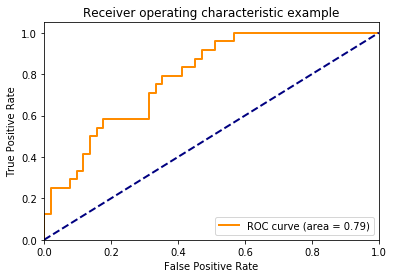

In [50]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()